In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
torch.__version__

'2.4.1+cu121'

In [ ]:
train_dataset = datasets.FashionMNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.FashionMNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=128,
                                          shuffle=False)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

(3, 482, 242)


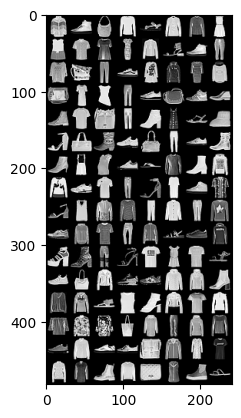

tensor([4, 7, 8, 2, 5, 6, 2, 3, 3, 6, 0, 3, 6, 5, 7, 1, 2, 8, 1, 7, 3, 2, 3, 2,
        8, 3, 3, 1, 7, 8, 7, 9, 9, 0, 8, 1, 9, 3, 5, 9, 5, 8, 9, 7, 8, 1, 7, 9,
        9, 3, 0, 7, 5, 2, 9, 2, 2, 7, 0, 1, 5, 3, 7, 6, 5, 6, 2, 2, 1, 4, 1, 2,
        7, 2, 0, 1, 4, 5, 7, 2, 5, 9, 1, 5, 0, 3, 0, 5, 7, 8, 4, 7, 7, 4, 4, 9,
        2, 2, 5, 0, 5, 4, 0, 2, 6, 4, 6, 8, 4, 1, 2, 2, 7, 6, 7, 7, 8, 4, 3, 0,
        2, 6, 9, 2, 8, 0, 9, 5])


In [ ]:
import torchvision
images, labels = next(iter(train_loader))    # get one batch from data loader
img_grid = torchvision.utils.make_grid(images)    # make a grid from batch
img_grid = img_grid.numpy()    # convert images to numpy for display
print(img_grid.shape)
plt.imshow(np.transpose(img_grid,  (1, 2, 0)))
plt.show()
print(labels)

In [ ]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.softmax=nn.Softmax(dim=1)
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [ ]:
MLP_model=MLP().to(device)
MLP_model

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=0.001)
num_epochs=10

In [ ]:
loss_list = []
iteration_list = []
accuracy_list = []
for i in range(num_epochs):
  for j,(images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1,28*28)).to(device)
    labels = labels.to(device)
    outputs = MLP_model(images)
    loss = loss_fn(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(j%len(train_loader)==0):
      loss_list.append(loss.item())
      iteration_list.append(i*len(train_loader)+j)
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(i+1, num_epochs, j+1, len(train_loader), loss.item()))
  correct = 0
  total = 0
  for images,labels in test_loader:
    images = Variable(images.view(-1,28*28)).to(device)
    labels = labels.to(device)
    output = MLP_model(images)
    _, predicted = torch.max(output,1)
    correct += (predicted == labels).sum()
    total += labels.size(0)
  accuracy_list.append(100*correct/total)
  print('Accuracy of the model: %.3f %%' %((100*correct)/total))

Epoch [1/10], Step [1/469], Loss: 2.3029
Accuracy of the model: 75.640 %
Epoch [2/10], Step [1/469], Loss: 1.7366
Accuracy of the model: 82.650 %
Epoch [3/10], Step [1/469], Loss: 1.6051
Accuracy of the model: 82.380 %
Epoch [4/10], Step [1/469], Loss: 1.6307
Accuracy of the model: 82.910 %
Epoch [5/10], Step [1/469], Loss: 1.6646
Accuracy of the model: 84.560 %
Epoch [6/10], Step [1/469], Loss: 1.6048
Accuracy of the model: 85.100 %
Epoch [7/10], Step [1/469], Loss: 1.6169
Accuracy of the model: 85.660 %
Epoch [8/10], Step [1/469], Loss: 1.5512
Accuracy of the model: 84.760 %
Epoch [9/10], Step [1/469], Loss: 1.6468
Accuracy of the model: 84.390 %
Epoch [10/10], Step [1/469], Loss: 1.6641
Accuracy of the model: 84.480 %


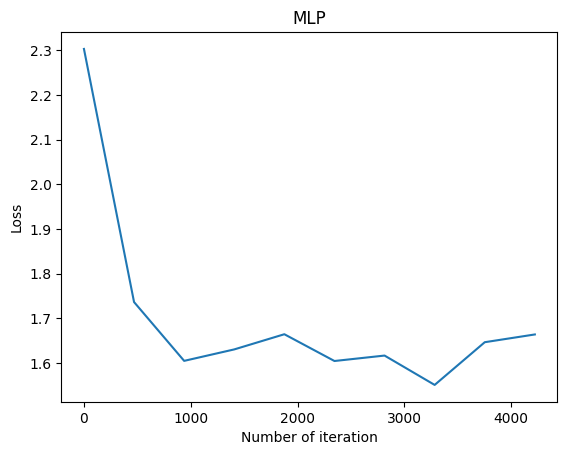

In [ ]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("MLP")
plt.show()

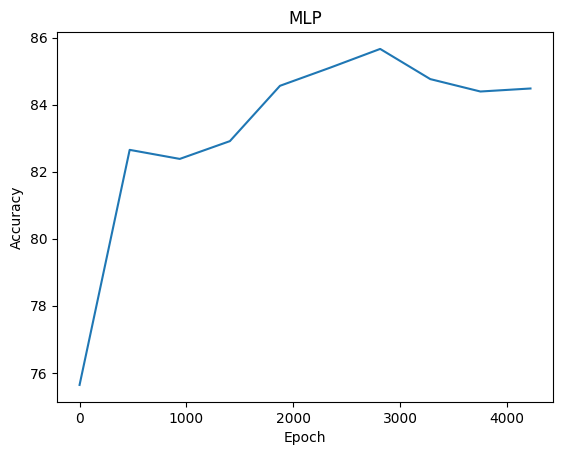

In [ ]:
plt.plot(iteration_list,[x.cpu().numpy() for x in accuracy_list])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MLP")
plt.show()

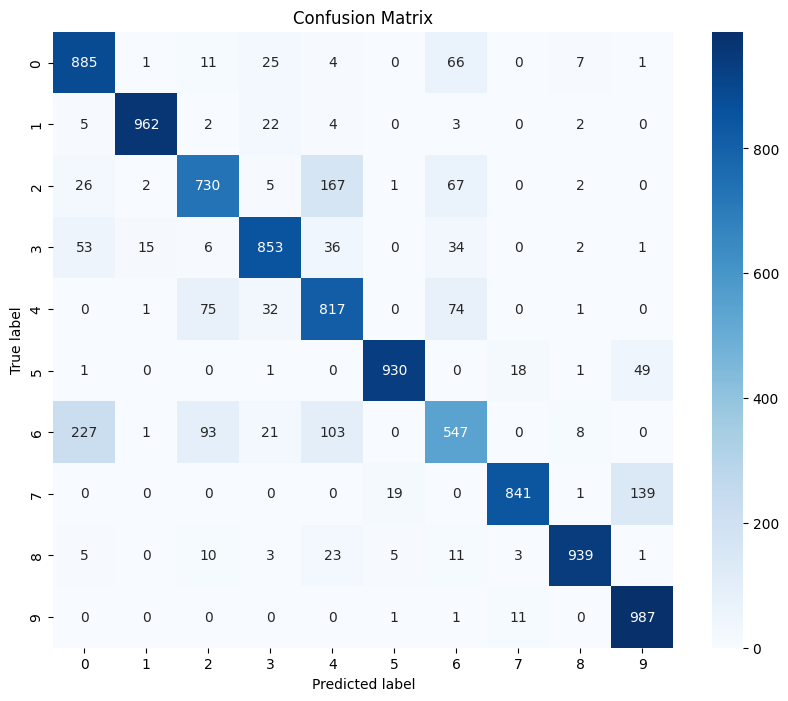

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.73      0.76      1000
           3       0.89      0.85      0.87      1000
           4       0.71      0.82      0.76      1000
           5       0.97      0.93      0.95      1000
           6       0.68      0.55      0.61      1000
           7       0.96      0.84      0.90      1000
           8       0.98      0.94      0.96      1000
           9       0.84      0.99      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
def get_predictions_and_labels(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return np.array(y_true), np.array(y_pred)
y_true, y_pred = get_predictions_and_labels(MLP_model, test_loader, device)
classes = list(range(10))
plot_confusion_matrix(y_true, y_pred, classes)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in classes]))